Loading Libraries

In [28]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import nltk
from sklearn.preprocessing import LabelBinarizer
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
from wordcloud import WordCloud
from wordcloud import STOPWORDS
from nltk.stem import WordNetLemmatizer
from nltk.tokenize import word_tokenize,sent_tokenize
from bs4 import BeautifulSoup
import re,string,unicodedata
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score
from sklearn.model_selection import train_test_split
from string import punctuation
from nltk import pos_tag
from nltk.corpus import wordnet
import keras
from keras.preprocessing import text, sequence
from keras.models import Sequential
from keras.layers import Dense,Embedding,LSTM,Dropout
from keras.callbacks import ReduceLROnPlateau
from keras.preprocessing.text import Tokenizer
import tensorflow as tf
from tensorflow.keras.preprocessing.sequence import pad_sequences

Loading *Data* from Google Drive

In [29]:
from google.colab import drive
drive.mount('/content/drive')

ModuleNotFoundError: No module named 'google.colab'

In [26]:
data_path = '/content/drive/MyDrive/raw_data/'

fake = pd.read_csv(data_path +'fake.csv')
true = pd.read_csv(data_path +'True.csv')
mixed = pd.read_csv(data_path +'train.csv')
hacker = pd.read_csv(data_path +'Training.csv')
welfake = pd.read_csv(data_path +'WELFake_Dataset.csv')


FileNotFoundError: [Errno 2] No such file or directory: '/content/drive/MyDrive/raw_data/fake.csv'

In [110]:
fake.head()

,title,text,subject,date
0,Donald Trump Sends Out Embarrassing New Year’...,Donald Trump just couldn t wish all Americans ...,News,"December 31, 2017"
1,Drunk Bragging Trump Staffer Started Russian ...,House Intelligence Committee Chairman Devin Nu...,News,"December 31, 2017"
2,Sheriff David Clarke Becomes An Internet Joke...,"On Friday, it was revealed that former Milwauk...",News,"December 30, 2017"
3,Trump Is So Obsessed He Even Has Obama’s Name...,"On Christmas day, Donald Trump announced that ...",News,"December 29, 2017"
4,Pope Francis Just Called Out Donald Trump Dur...,Pope Francis used his annual Christmas Day mes...,News,"December 25, 2017"


In [111]:
true.head()

,title,text,subject,date
0,"As U.S. budget fight looms, Republicans flip t...",WASHINGTON (Reuters) - The head of a conservat...,politicsNews,"December 31, 2017"
1,U.S. military to accept transgender recruits o...,WASHINGTON (Reuters) - Transgender people will...,politicsNews,"December 29, 2017"
2,Senior U.S. Republican senator: 'Let Mr. Muell...,WASHINGTON (Reuters) - The special counsel inv...,politicsNews,"December 31, 2017"
3,FBI Russia probe helped by Australian diplomat...,WASHINGTON (Reuters) - Trump campaign adviser ...,politicsNews,"December 30, 2017"
4,Trump wants Postal Service to charge 'much mor...,SEATTLE/WASHINGTON (Reuters) - President Donal...,politicsNews,"December 29, 2017"


In [112]:
mixed.head()

,id,title,author,text,label
0,0,House Dem Aide: We Didn’t Even See Comey’s Let...,Darrell Lucus,House Dem Aide: We Didn’t Even See Comey’s Let...,1
1,1,"FLYNN: Hillary Clinton, Big Woman on Campus - ...",Daniel J. Flynn,Ever get the feeling your life circles the rou...,0
2,2,Why the Truth Might Get You Fired,Consortiumnews.com,"Why the Truth Might Get You Fired October 29, ...",1
3,3,15 Civilians Killed In Single US Airstrike Hav...,Jessica Purkiss,Videos 15 Civilians Killed In Single US Airstr...,1
4,4,Iranian woman jailed for fictional unpublished...,Howard Portnoy,Print \nAn Iranian woman has been sentenced to...,1


In [113]:
hacker.head()

,Labels,Text,Text_Tag
0,1,Says the Annies List political group supports ...,abortion
1,2,When did the decline of coal start? It started...,"energy,history,job-accomplishments"
2,3,"Hillary Clinton agrees with John McCain ""by vo...",foreign-policy
3,1,Health care reform legislation is likely to ma...,health-care
4,2,The economic turnaround started at the end of ...,"economy,jobs"


In [114]:
welfake.head()

,Unnamed: 0,title,text,label
0,0,LAW ENFORCEMENT ON HIGH ALERT Following Threat...,No comment is expected from Barack Obama Membe...,1
1,1,NaN,Did they post their votes for Hillary already?,1
2,2,UNBELIEVABLE! OBAMA’S ATTORNEY GENERAL SAYS MO...,"Now, most of the demonstrators gathered last ...",1
3,3,"Bobby Jindal, raised Hindu, uses story of Chri...",A dozen politically active pastors came here f...,0
4,4,SATAN 2: Russia unvelis an image of its terrif...,"The RS-28 Sarmat missile, dubbed Satan 2, will...",1


Prepare Dataset for Preprocessing

In [115]:
true['label'] = 1
fake['label'] = 0

In [116]:
true.head()

,title,text,subject,date,label
0,"As U.S. budget fight looms, Republicans flip t...",WASHINGTON (Reuters) - The head of a conservat...,politicsNews,"December 31, 2017",1
1,U.S. military to accept transgender recruits o...,WASHINGTON (Reuters) - Transgender people will...,politicsNews,"December 29, 2017",1
2,Senior U.S. Republican senator: 'Let Mr. Muell...,WASHINGTON (Reuters) - The special counsel inv...,politicsNews,"December 31, 2017",1
3,FBI Russia probe helped by Australian diplomat...,WASHINGTON (Reuters) - Trump campaign adviser ...,politicsNews,"December 30, 2017",1
4,Trump wants Postal Service to charge 'much mor...,SEATTLE/WASHINGTON (Reuters) - President Donal...,politicsNews,"December 29, 2017",1


Equalizing Columns

In [117]:
values = [1,5]
hacker = hacker[hacker.Labels.isin(values) == True]
hacker['Labels'] = hacker['Labels'].replace([1],0)
hacker['Labels'] = hacker['Labels'].replace([5],1)
hacker = hacker.rename(columns={'Labels': 'label', 'Text':'text'}) 
del hacker['Text_Tag']
hacker
hacker.head()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


,label,text
0,0,Says the Annies List political group supports ...
3,0,Health care reform legislation is likely to ma...
5,1,The Chicago Bears have had more starting quart...
12,0,When Mitt Romney was governor of Massachusetts...
16,1,McCain opposed a requirement that the governme...


In [118]:
true['text'] = true['text'] + " " + true['title']
fake['text'] = fake['text'] + " " + fake['title']
mixed['text'] = mixed['text'] + " " + mixed['title']
welfake['text'] = welfake['text'] + " " + welfake['title']

In [119]:
del true['title']
del true['subject']
del true['date']

In [ ]:
del fake['title']
del fake['subject']
del fake['date']

In [122]:
del mixed['title']
del mixed['author']
del mixed['id']

In [123]:
del welfake['title']
del welfake['Unnamed: 0']

Merging Dataset

In [124]:
df = pd.concat([true,fake, mixed, hacker, welfake])

In [125]:
df.reset_index(inplace = True)

In [126]:
del df['index']

In [198]:
df.head(15)

,text,label
0,"[washington, reuters, head, conservative, repu...",1
1,"[washington, reuters, transgender, people, all...",1
2,"[washington, reuters, special, counsel, invest...",1
3,"[washington, reuters, trump, campaign, adviser...",1
4,"[seattlewashington, reuters, president, donald...",1
5,"[west, palm, beach, flawashington, reuters, wh...",1
6,"[west, palm, beach, fla, reuters, president, d...",1
7,"[following, statements, posted, verified, twit...",1
8,"[following, statements, posted, verified, twit...",1
9,"[washington, reuters, alabama, secretary, stat...",1


Exporting merged Dataset


In [21]:
df.to_csv('/content/drive/MyDrive/raw_data/merged_df.csv')

In [128]:
df

,text,label
0,WASHINGTON (Reuters) - The head of a conservat...,1
1,WASHINGTON (Reuters) - Transgender people will...,1
2,WASHINGTON (Reuters) - The special counsel inv...,1
3,WASHINGTON (Reuters) - Trump campaign adviser ...,1
4,SEATTLE/WASHINGTON (Reuters) - President Donal...,1
...,...,...
141498,WASHINGTON (Reuters) - Hackers believed to be ...,0
141499,"You know, because in fantasyland Republicans n...",1
141500,Migrants Refuse To Leave Train At Refugee Camp...,0
141501,MEXICO CITY (Reuters) - Donald Trump’s combati...,0


Checking for NaN Values

In [129]:
df.isna().sum()

text     1194
label       0
dtype: int64

Checking for Duplicated Values

In [130]:
df.duplicated().sum()

35614

Droping Duplicated and NaN Values

In [131]:
df = df.drop_duplicates()

In [132]:
df = df.dropna()

In [133]:
df.label.value_counts() / len(df) *100

0    51.646079
1    48.353921
Name: label, dtype: float64

In [134]:
len(df)

105888

Data Cleaning

In [135]:
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [136]:
# Importing Stopwords
stop = set(stopwords.words('english'))
punctuation = list(string.punctuation)
stop.update(punctuation)



In [137]:
%%time
from tkinter import Text
#Removing html references
def strip_html(text):
    soup = BeautifulSoup(text, "html.parser")
    return soup.get_text()

#Removing the square brackets
def remove_between_square_brackets(text):
    return re.sub("""\[[^]”“'"]*\]""", '', text)

# Removing URL's
def remove_between_square_brackets(text):
    return re.sub(r'http\S+', '', text)

# Removing numbers
def remove_numbers(text):
  text = ''.join(i for i in text if not i.isdigit())
  return text

# Removing punctuation
def remove_punctuation(text):
    for punctuation in string.punctuation:
        text = text.replace(punctuation, '')
        text = text.replace('“', '')
        text = text.replace('”', '')
        text = text.replace('’', '')
    text = text.strip()
    
    return text

# Removing links
def remove_links(text):
    return re.sub(r'bit.ly\S+', '', text)

#Removing the stopwords from text
def remove_stopwords(text):
    final_text = []
    for i in text.split():
        if i.strip().lower() not in stop:
            final_text.append(i.strip())
    return " ".join(final_text)


#Removing the noisy text
def denoise_text(text):
    text = text.lower() # making letters lower case
    text = strip_html(text) 
    text = remove_links(text)
    text = remove_punctuation(text)
    text = remove_numbers(text)
    text = remove_between_square_brackets(text)
    text = remove_stopwords(text)
    
    return text

#Apply function on review column
df['text']=df['text'].apply(denoise_text)

CPU times: user 1min 25s, sys: 711 ms, total: 1min 25s
Wall time: 1min 25s


Exporting cleaned Dataset

In [138]:
df.reset_index(inplace = True)
del df['index']


In [139]:
df

,text,label
0,washington reuters head conservative republica...,1
1,washington reuters transgender people allowed ...,1
2,washington reuters special counsel investigati...,1
3,washington reuters trump campaign adviser geor...,1
4,seattlewashington reuters president donald tru...,1
...,...,...
105883,email released wikileaks sunday appears show f...,1
105884,washington reuters hackers believed working ru...,0
105885,know fantasyland republicans never questioned ...,1
105886,migrants refuse leave train refugee camp hunga...,0


In [140]:
df['text'][54764]

'deportation illegal immigrants hit low president obamas last full fiscal year office u department homeland security also appeared cutting back information provided three law enforcement agencies administration waited last friday year release final fy report immigration customs enforcement removal operations wonder waited day hardly soul paying attention numbers ice abysmal even worse center immigration studies director policy studies jessica vaughn reported week award government reports aim obfuscate spin would nominate one vaughn wrote annual reports historically provided basic statistics three departments law enforcement agencies year report sneaked dhs officials last working day month normally two versions scaled back provide fraction information normally disclosed reported compiled office immigration statistics ois new director marc rosenblum vaughn listed following key findings annual report one priorities obama administration supposed deporting criminal aliens others designated 

Exporting DataFrame to CSV File

In [86]:
df.to_csv('/content/drive/MyDrive/raw_data/cleaned_df.csv')

Visualization Layout

In [ ]:
#True News
plt.figure(figsize = (20,20)) # Text that is not Fake
wc = WordCloud(max_words = 2000 , width = 1600 , height = 800 , stopwords = STOPWORDS).generate(" ".join(df[df.label == 1].text))
plt.imshow(wc , interpolation = 'bilinear')

In [ ]:
#True News
plt.figure(figsize = (20,20)) # Text that is not Fake
wc = WordCloud(max_words = 2000 , width = 1600 , height = 800 , stopwords = STOPWORDS).generate(" ".join(df[df.label == 0].text))
plt.imshow(wc , interpolation = 'bilinear')

Counting Words

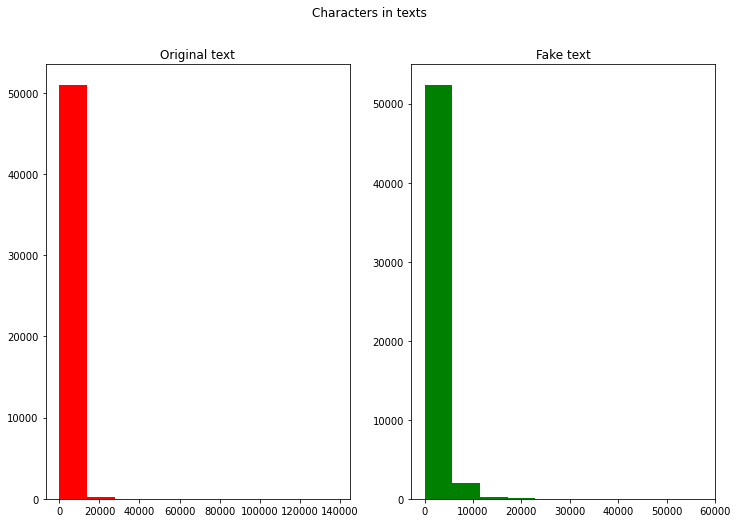

In [87]:
fig,(ax1,ax2)=plt.subplots(1,2,figsize=(12,8))
text_len=df[df['label']==1]['text'].str.len()
ax1.hist(text_len,color='red')
ax1.set_title('Original text')
text_len=df[df['label']==0]['text'].str.len()
ax2.hist(text_len,color='green')
ax2.set_title('Fake text')
fig.suptitle('Characters in texts')
plt.show()

Words Counting

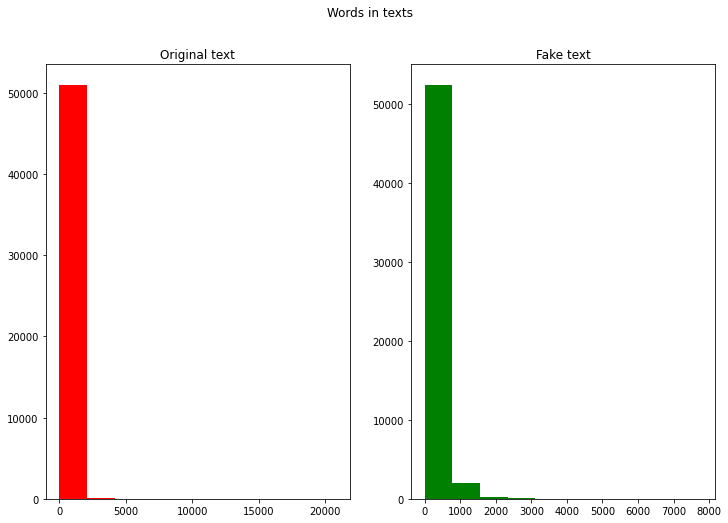

In [88]:
fig,(ax1,ax2)=plt.subplots(1,2,figsize=(12,8))
text_len=df[df['label']==1]['text'].str.split().map(lambda x: len(x))
ax1.hist(text_len,color='red')
ax1.set_title('Original text')
text_len=df[df['label']==0]['text'].str.split().map(lambda x: len(x))
ax2.hist(text_len,color='green')
ax2.set_title('Fake text')
fig.suptitle('Words in texts')
plt.show()

Tokenizing Words

In [141]:
import nltk
nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [142]:
%%time
def prep(text) :
    text = word_tokenize(text)
    return text

df['text'] = df['text'].map(prep)

CPU times: user 2min 9s, sys: 4.51 s, total: 2min 14s
Wall time: 2min 14s


In [ ]:
df['text'][1552]

In [ ]:
# Take a look at the length of each text
# Here for evey row i'm getting its length(how many words it contains)

sns.histplot(df['text'].map(lambda x : len(x)))

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


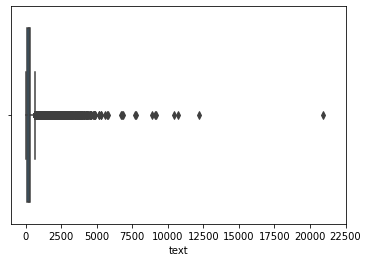

In [94]:
sns.boxplot(df['text'].map(lambda x : len(x)))
plt.xticks([i*2500 for i in range(10)]);

In [144]:
df['text'].map(lambda x : len(x)).max()

20915

In [145]:
df['text'].map(lambda x : len(x)).mean()

275.98853505590813

Filtering data for Padding

In [146]:
# Create a column for the number of words in each row

df['num_words'] = df['text'].map(lambda x : len(x))

In [147]:
# Number of rows with more than 500 words is 15273

len(df[df['num_words'] > 500])

12662

In [148]:
# Getting rid of rows that have more than 500 words

df = df[df['num_words'] <= 500]

In [149]:
# Dropping the num_words columns because i just used it to filter out data with large number of words

del df['num_words']

**New Dataset prepared for Padding with text with less than 500 Words**

In [151]:
df.reset_index(inplace= True)
del df['index']

len(df)
df

,text,label
0,"[washington, reuters, head, conservative, repu...",1
1,"[washington, reuters, transgender, people, all...",1
2,"[washington, reuters, special, counsel, invest...",1
3,"[washington, reuters, trump, campaign, adviser...",1
4,"[seattlewashington, reuters, president, donald...",1
...,...,...
93221,"[email, released, wikileaks, sunday, appears, ...",1
93222,"[washington, reuters, hackers, believed, worki...",0
93223,"[know, fantasyland, republicans, never, questi...",1
93224,"[migrants, refuse, leave, train, refugee, camp...",0


Export tokenized Dataset in CSV(Prepared for Padding)

In [152]:
df.to_csv('/content/drive/MyDrive/raw_data/tokenized_df.csv')

Splitting Dataset

In [4]:
df = pd.read_csv('./raw_data/tokenized_df.csv')

In [7]:
del df['Unnamed: 0']

In [8]:
df

,text,label
0,"['washington', 'reuters', 'head', 'conservativ...",1
1,"['washington', 'reuters', 'transgender', 'peop...",1
2,"['washington', 'reuters', 'special', 'counsel'...",1
3,"['washington', 'reuters', 'trump', 'campaign',...",1
4,"['seattlewashington', 'reuters', 'president', ...",1
...,...,...
93221,"['email', 'released', 'wikileaks', 'sunday', '...",1
93222,"['washington', 'reuters', 'hackers', 'believed...",0
93223,"['know', 'fantasyland', 'republicans', 'never'...",1
93224,"['migrants', 'refuse', 'leave', 'train', 'refu...",0


In [9]:
x_train,x_test,y_train,y_test = train_test_split(df.text,df.label,random_state = 0)

In [10]:
max_features = 10000
maxlen = 500

Tokenizing and Padding

Tokenizing Text -> Representing each word by a number

In [22]:


tokenizer = text.Tokenizer(num_words=max_features)
tokenizer.fit_on_texts(x_train)
tokenized_train = tokenizer.texts_to_sequences(x_train)
x_train = sequence.pad_sequences(tokenized_train, maxlen=maxlen)

ModuleNotFoundError: No module named 'tf'

In [ ]:
tokenized_test = tokenizer.texts_to_sequences(x_test)
X_test = sequence.pad_sequences(tokenized_test, maxlen=maxlen)

GloVe

GloVe method is built on an important idea, You can derive semantic relationships between words from the co-occurrence matrix. 

In [ ]:
EMBEDDING_FILE = '/content/drive/MyDrive/raw_data/glove.twitter.27B.25d.txt'

In [ ]:
def get_coefs(word, *arr): 
    return word, np.asarray(arr, dtype='float32')
embeddings_index = dict(get_coefs(*o.rstrip().rsplit(' ')) for o in open(EMBEDDING_FILE))

In [ ]:
all_embs = np.stack(embeddings_index.values())
emb_mean,emb_std = all_embs.mean(), all_embs.std()
embed_size = all_embs.shape[1]

word_index = tokenizer.word_index
nb_words = min(max_features, len(word_index))
#change below line if computing normal stats is too slow
embedding_matrix = embedding_matrix = np.random.normal(emb_mean, emb_std, (nb_words, embed_size))
for word, i in word_index.items():
    if i >= max_features: continue
    embedding_vector = embeddings_index.get(word)
    if embedding_vector is not None: embedding_matrix[i] = embedding_vector

Training Model

In [188]:
batch_size = 256
epochs = 2
embed_size = 25

In [189]:
learning_rate_reduction = ReduceLROnPlateau(monitor='val_accuracy', patience = 2, verbose=1,factor=0.5, min_lr=0.00001)

In [199]:
from tensorflow import keras
from tensorflow.keras import layers

opt = keras.optimizers.Adam(lr = 0.01)

#Defining Neural Network
model = Sequential()

#Non-trainable embeddidng layer
model.add(Embedding(max_features, output_dim=embed_size, weights=[embedding_matrix], input_length=maxlen, trainable=True))

#LSTM 
model.add(LSTM(units=128 , return_sequences = True , recurrent_dropout = 0.25 , dropout = 0.25))
model.add(LSTM(units=64 , recurrent_dropout = 0.1 , dropout = 0.1))
model.add(Dense(units = 64 , activation = 'relu'))
model.add(Dense(units = 64 , activation = 'tahn'))
model.add(Dense(1, activation='sigmoid'))
model.compile(optimizer=opt, loss='binary_crossentropy', metrics=['accuracy'])

/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


In [ ]:
history = model.fit(x_train, y_train, batch_size = batch_size , validation_data = (X_test,y_test) , epochs = epochs , callbacks = [learning_rate_reduction])

Epoch 1/2
242/274 [=========================>....] - ETA: 3:58 - loss: 0.6701 - accuracy: 0.5352